In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm
import pysam
from Bio.Seq import Seq

In [2]:
import json
f = open('/home/mark/Desktop/chromosome_y/json_dict/HG02011_cluster.json') 
T2T_dict = json.load(f) 

In [3]:
T2T_startStopDict = {key:[] for key in T2T_dict.keys()}
for key in T2T_startStopDict.keys():
    T2T_startStopDict[key].append(T2T_dict[key][0][0].split(" ")[6].strip())
    T2T_startStopDict[key].append(T2T_dict[key][-1][-1].split(" ")[7].strip())

In [4]:
T2T_startStopDict

{'0': ['18149034', '18182759'],
 '1': ['18900746', '18945179'],
 '2': ['19049376', '19092103'],
 '3': ['19142524', '19153738'],
 '4': ['20813343', '21116212'],
 '5': ['21811963', '21980613'],
 '6': ['22777166', '23093014'],
 '7': ['23464338', '23672760'],
 '8': ['24313645', '24532951'],
 '9': ['24955155', '25181711'],
 '10': ['25685889', '25890035'],
 '11': ['26470995', '26679405'],
 '12': ['27340124', '27544920'],
 '13': ['28027871', '28236831'],
 '14': ['28798811', '29525035'],
 '15': ['29949653', '30056504'],
 '16': ['30421007', '30942436'],
 '17': ['31235568', '31829649'],
 '18': ['32431078', '32795324'],
 '19': ['32974074', '33283104'],
 '20': ['33911669', '34188797'],
 '21': ['34954084', '35446443'],
 '22': ['35762145', '36910298'],
 '23': ['37565880', '38262710'],
 '24': ['38997705', '39090593'],
 '25': ['39518844', '39556272'],
 '26': ['39870612', '39901629'],
 '27': ['40160640', '40183735'],
 '28': ['40194508', '40214604'],
 '29': ['40224615', '40245820'],
 '30': ['40252219', 

In [5]:
samtools='temp'
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HG02011_finalized.txt') as f:
    Lines = f.readlines()
    myLines = []
    lineNum = 0

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
        samtools=goodLine.split(" ")[5]
        myLines.append(goodLine)

100%|█████████████████████████████████| 19741/19741 [00:00<00:00, 402466.11it/s]


In [6]:
myLines2 = myLines.copy()
myLines3 = myLines.copy()

In [7]:
NRB_Blocks={}
i = 0
firstFlag = 0
keyList = list(T2T_startStopDict.keys())
myKey = 0

for key in tqdm(keyList):
    
    if firstFlag == 0:
    
        NRB_Blocks[key]=str(16990153)+"-"+str(int(T2T_startStopDict[key][0])-1)

        firstFlag=1
        myKey+=1
                
    else:
        
        NRB_Blocks[key]=str(int(T2T_startStopDict[str(int(key)-1)][1])+1)+"-"+str(int(T2T_startStopDict[key][0])-1)
            

100%|███████████████████████████████████████| 31/31 [00:00<00:00, 236836.84it/s]


In [8]:
NRB_Blocks.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30'])

In [9]:
import collections
templist = []

for key in list(NRB_Blocks.keys())[:-3]:
    templist.append([key, 'Spacer Block', (int(NRB_Blocks[key].split("-")[1])-int(NRB_Blocks[key].split("-")[0]))+1, int(NRB_Blocks[key].split("-")[0]), int(NRB_Blocks[key].split("-")[1])])
    templist.append([key, 'Repeat Block', (int(T2T_startStopDict[key][1])-int(T2T_startStopDict[str(key)][0]))+1, int(T2T_startStopDict[key][0]), int(T2T_startStopDict[key][1])])
    
tempDF = pd.DataFrame(data=templist, columns=['Block_Number','Block_Type','Length','Start','End'])
tempDF['SampleName']='HG02011'

In [10]:
tempDF

,Block_Number,Block_Type,Length,Start,End,SampleName
0,0,Spacer Block,1158881,16990153,18149033,HG02011
1,0,Repeat Block,33726,18149034,18182759,HG02011
2,1,Spacer Block,717986,18182760,18900745,HG02011
3,1,Repeat Block,44434,18900746,18945179,HG02011
4,2,Spacer Block,104196,18945180,19049375,HG02011
5,2,Repeat Block,42728,19049376,19092103,HG02011
6,3,Spacer Block,50420,19092104,19142523,HG02011
7,3,Repeat Block,11215,19142524,19153738,HG02011
8,4,Spacer Block,1659604,19153739,20813342,HG02011
9,4,Repeat Block,302870,20813343,21116212,HG02011


In [48]:
#Pull the sequences for the spacer blocks (This is for RepeatMasker)
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/HG02011_spacerSequences_cleaned.fasta', 'a+') as file:
    for row in tempDF.index:
        if str(tempDF.at[row,'Block_Type']) == 'Spacer Block':
            file.write(">"+str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG02011.HIFIRW.ONTUL.na.chrY.fasta', "chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])).split("\n")[0]).split("0000585.")[1])
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG02011.HIFIRW.ONTUL.na.chrY.fasta', "chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])).split(str(tempDF.at[row,'End']))[1])
        else:
            continue

file.close()

In [12]:
#Pull the sequences for the spacer blocks
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/HG02011_spacerSequences.fasta', 'a+') as file:
    for row in tempDF.index:
        if str(tempDF.at[row,'Block_Type']) == 'Spacer Block':
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG02011.HIFIRW.ONTUL.na.chrY.fasta', "chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])))
        else:
            continue

file.close()

## Load in HaeIII Restriction Data

In [3]:
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/HG02011_digestion.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/HG02011_digestion_cleaned.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                start=int(line.split("HG02011:")[1].split(",")[0].split("-")[0]) 
                cord1=int(line.split("base")[1].split(" ")[1])
                cord2=int(line.split("base")[2].split(" ")[1])
                file2.write(">HG02011:"+str(start+cord1)+"-"+str(start+cord2)+'\n')
            else:
                file2.write(line)
    file2.close()
file.close()


100%|██████████████████████████████| 266914/266914 [00:00<00:00, 1080501.55it/s]


In [10]:
spacerDictionary = {}
for key in NRB_Blocks.keys():
    spacerDictionary[str(samtools)+":"+str(NRB_Blocks[key])]=key
    #spacerDictionary["HC02666:"+str(NRB_Blocks[key])]=key
spacerDictionary

{'chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:16990153-18149033': '0',
 'chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:18182760-18900745': '1',
 'chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:18945180-19049375': '2',
 'chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:19092104-19142523': '3',
 'chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:19153739-20813342': '4',
 'chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:21116213-21811962': '5',
 'chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:21980614-22777165': '6',
 'chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:23093015-23464337': '7',
 'chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:23672761-24313644': '8',
 'chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:24532952-24955154': '9',
 'chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:25181712-25685888': '10',
 'chrY.09-24.01.HET1_centro-PAR

In [12]:
spacerDictionary2 = {}
for key in NRB_Blocks.keys():
    spacerDictionary2["HG02011:"+str(NRB_Blocks[key])]=key
spacerDictionary2

{'HG02011:16990153-18149033': '0',
 'HG02011:18182760-18900745': '1',
 'HG02011:18945180-19049375': '2',
 'HG02011:19092104-19142523': '3',
 'HG02011:19153739-20813342': '4',
 'HG02011:21116213-21811962': '5',
 'HG02011:21980614-22777165': '6',
 'HG02011:23093015-23464337': '7',
 'HG02011:23672761-24313644': '8',
 'HG02011:24532952-24955154': '9',
 'HG02011:25181712-25685888': '10',
 'HG02011:25890036-26470994': '11',
 'HG02011:26679406-27340123': '12',
 'HG02011:27544921-28027870': '13',
 'HG02011:28236832-28798810': '14',
 'HG02011:29525036-29949652': '15',
 'HG02011:30056505-30421006': '16',
 'HG02011:30942437-31235567': '17',
 'HG02011:31829650-32431077': '18',
 'HG02011:32795325-32974073': '19',
 'HG02011:33283105-33911668': '20',
 'HG02011:34188798-34954083': '21',
 'HG02011:35446444-35762144': '22',
 'HG02011:36910299-37565879': '23',
 'HG02011:38262711-38997704': '24',
 'HG02011:39090594-39518843': '25',
 'HG02011:39556273-39870611': '26',
 'HG02011:39901630-40160639': '27',
 '

In [13]:
SpacerBlocks={x:[] for x in spacerDictionary.values()}
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/HG02011_Headers.txt') as f:
    Lines = f.readlines()
    
    for line in tqdm(Lines):
        SpacerBlocks[spacerDictionary[line.split(" ")[7].split(",")[0]]].append(str(line.split(" ")[0].split(">")[1])+"_"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[9]))+"-"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[12])))
    f.close()
SpacerBlockList = []
for key in SpacerBlocks.keys():
    for item in SpacerBlocks[key]:
        SpacerBlockList.append([int(key), int(item.split("_")[0]), int(item.split("_")[1].split("-")[0]), int(item.split("_")[1].split("-")[1])])

        tempDF = pd.DataFrame(data=SpacerBlockList, columns=['SpacerBlock','Length','Start','End'])
group = tempDF.groupby("SpacerBlock")
sort_function = lambda x: x.sort_values(by="Start", ascending = True)
desired_df = group.apply(sort_function)

100%|███████████████████████████████████| 4242/4242 [00:00<00:00, 183338.19it/s]


In [14]:
desired_df

SpacerBlock  Length     Start       End
SpacerBlock                                              
0           5               0   16301  16990154  17006454
            0               0  154943  17006455  17161397
            235             0    1118  17161398  17162515
            233             0    1591  17162516  17164106
            239             0    1109  17164107  17165215
...                       ...     ...       ...       ...
27          4229           27    3482  40146432  40149913
            4224           27    3499  40149914  40153412
            4208           27    3544  40153413  40156956
            4209           27    3533  40156957  40160489
            4241           27     151  40160490  40160640

[4242 rows x 4 columns]

In [15]:
#desired_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG02011_fragmentLengths.csv")

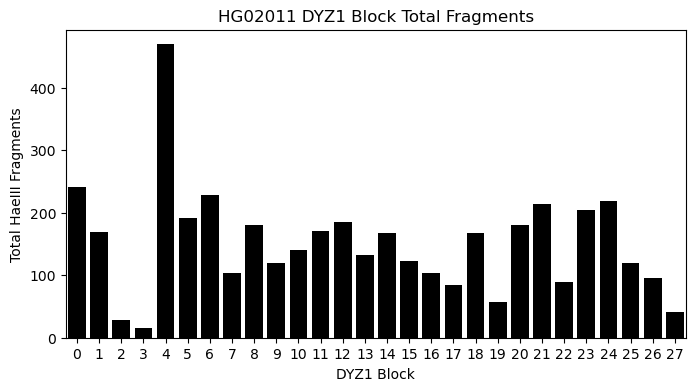

In [22]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 8,4
barplotList = []
for key in SpacerBlocks.keys():
    if int(key) < 28:
        barplotList.append([key, len(desired_df[desired_df['SpacerBlock']==int(key)])])
barplotDF = pd.DataFrame(data=barplotList, columns=['SpacerBlock','Total Fragments'])
sns.barplot(data=barplotDF, x='SpacerBlock', y='Total Fragments', color='black')
plt.title("HG02011 DYZ1 Block Total Fragments")
plt.xlabel("DYZ1 Block")
plt.ylabel("Total HaeIII Fragments")
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG02011_HaeIII_TotalFragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [54]:
print("Mean: "+str(np.mean(desired_df[desired_df['SpacerBlock']<28]['Length'])))
print("Median: "+str(np.median(desired_df[desired_df['SpacerBlock']<28]['Length'])))

Mean: 3623.935407826497
Median: 3554.0


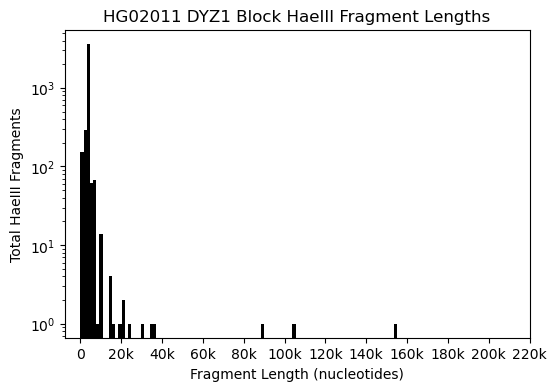

In [24]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 6,4
plt.hist(desired_df[desired_df['SpacerBlock']<28]['Length'], log=True, bins=100, color='black')
plt.title("HG02011 DYZ1 Block HaeIII Fragment Lengths")
plt.xlabel("Fragment Length (nucleotides)")
plt.ylabel("Total HaeIII Fragments")
x = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000]
labels = ['0', '20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k', '180k', '200k', '220k']
  
plt.xticks(x, labels, rotation ='horizontal')

#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG02011_HaeIII_Fragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Import Repeatmasker and Visualize

In [56]:
desired_df['Coordinates']='temp'
for row in desired_df.index:
    desired_df.at[row,'Coordinates']='HG02011:'+str(desired_df.at[row,'Start'])+"-"+str(desired_df.at[row,'End'])

In [57]:
desired_df2 = desired_df.set_index("Coordinates").copy()
desired_df2

,SpacerBlock,Length,Start,End
Coordinates,,,,
HG02011:16990154-17006454,0,16301,16990154,17006454
HG02011:17006455-17161397,0,154943,17006455,17161397
HG02011:17161398-17162515,0,1118,17161398,17162515
HG02011:17162516-17164106,0,1591,17162516,17164106
HG02011:17164107-17165215,0,1109,17164107,17165215
...,...,...,...,...
HG02011:40146432-40149913,27,3482,40146432,40149913
HG02011:40149914-40153412,27,3499,40149914,40153412
HG02011:40153413-40156956,27,3544,40153413,40156956


In [58]:
sampleDict = {x:'+' for x in desired_df2.index}

In [59]:
spaceBlockDict = {x:{} for x in spacerDictionary.values()}
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/HG02011_digestion_cleaned.fasta.out') as f:
    Lines = f.readlines()
    
    for line in tqdm(Lines):
        
        goodLine = ' '.join(line.split())
        if 'HSATII' in goodLine:
            #print(goodLine)
            sampleDict[str(goodLine.split(" ")[4])]=str(goodLine.split(" ")[8])
        else:
            continue
        
    f.close()

100%|█████████████████████████████████| 45450/45450 [00:00<00:00, 417861.01it/s]


In [60]:
sampleDict

{'HG02011:16990154-17006454': 'C',
 'HG02011:17006455-17161397': 'C',
 'HG02011:17161398-17162515': 'C',
 'HG02011:17162516-17164106': 'C',
 'HG02011:17164107-17165215': 'C',
 'HG02011:17165216-17167237': 'C',
 'HG02011:17167238-17169936': 'C',
 'HG02011:17169937-17172635': 'C',
 'HG02011:17172636-17175756': 'C',
 'HG02011:17175757-17176870': 'C',
 'HG02011:17176871-17178887': 'C',
 'HG02011:17178888-17182018': 'C',
 'HG02011:17182019-17183132': 'C',
 'HG02011:17183133-17185169': 'C',
 'HG02011:17185170-17187868': 'C',
 'HG02011:17187869-17190994': 'C',
 'HG02011:17190995-17192108': 'C',
 'HG02011:17192109-17194125': 'C',
 'HG02011:17194126-17198354': 'C',
 'HG02011:17198355-17201461': 'C',
 'HG02011:17201462-17203463': 'C',
 'HG02011:17203464-17238768': 'C',
 'HG02011:17238769-17268915': 'C',
 'HG02011:17268916-17272022': 'C',
 'HG02011:17272023-17376987': 'C',
 'HG02011:17376988-17387664': 'C',
 'HG02011:17387665-17397333': 'C',
 'HG02011:17397334-17417329': 'C',
 'HG02011:17417330-1

In [61]:
desired_df2['Orientation']=[x for x in sampleDict.values()]
desired_df2

,SpacerBlock,Length,Start,End,Orientation
Coordinates,,,,,
HG02011:16990154-17006454,0,16301,16990154,17006454,C
HG02011:17006455-17161397,0,154943,17006455,17161397,C
HG02011:17161398-17162515,0,1118,17161398,17162515,C
HG02011:17162516-17164106,0,1591,17162516,17164106,C
HG02011:17164107-17165215,0,1109,17164107,17165215,C
...,...,...,...,...,...
HG02011:40146432-40149913,27,3482,40146432,40149913,C
HG02011:40149914-40153412,27,3499,40149914,40153412,C
HG02011:40153413-40156956,27,3544,40153413,40156956,C


In [62]:
#desired_df2 = desired_df[desired_df['SpacerBlock']<23].copy()
#desired_df2['Orientation']='temp'
desired_df2['Color']='black'

In [63]:
for row in desired_df2.index:
    if desired_df2.at[row,'Orientation'] == '+':
        desired_df2.at[row,'Color']='blue'
    elif desired_df2.at[row,'Orientation'] == 'C':
        desired_df2.at[row,'Color']='red'
    else:
        continue

In [64]:
desired_df2

,SpacerBlock,Length,Start,End,Orientation,Color
Coordinates,,,,,,
HG02011:16990154-17006454,0,16301,16990154,17006454,C,red
HG02011:17006455-17161397,0,154943,17006455,17161397,C,red
HG02011:17161398-17162515,0,1118,17161398,17162515,C,red
HG02011:17162516-17164106,0,1591,17162516,17164106,C,red
HG02011:17164107-17165215,0,1109,17164107,17165215,C,red
...,...,...,...,...,...,...
HG02011:40146432-40149913,27,3482,40146432,40149913,C,red
HG02011:40149914-40153412,27,3499,40149914,40153412,C,red
HG02011:40153413-40156956,27,3544,40153413,40156956,C,red


In [65]:
print(collections.Counter(desired_df2['Orientation']))
print(collections.Counter(desired_df2['Color']))

Counter({'C': 3950, '+': 292})
Counter({'red': 3950, 'blue': 292})


In [66]:
#####################################################################################

In [67]:
rb_df = desired_df2.copy()

# Clusters

In [68]:
import pysam
from Bio.Seq import Seq

In [69]:
def split(word):
    return [char for char in word]

tempList = {}

#All Rows
for row in rb_df.index:
    
#Comment this out for all fragments
#for row in rb_df[(rb_df['Color']!='')].index:
    
# 2nd Pass BlueRows
#for row in rb_df.loc[BlackRows].index:
    
    
    tempDict = {}
    
    sequence = (pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG02011.HIFIRW.ONTUL.na.chrY.fasta', "chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End'])))

    if rb_df.at[row,'Color'] == 'blue':
        
        
        mySeq1 = sequence.split("HG02011:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))[1].strip()
        seq = Seq(mySeq1)
        mySeq = split(seq.reverse_complement())
        
    else:
        mySeq = (split(sequence.split("HG02011:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))[1].strip()))
    
    goodSeq = []
    for x in mySeq:
        if str(x) != '\n':
            goodSeq.append(str(x))
        else:
            continue

    
    i=0
    while i < len(goodSeq):
        
        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
            else:
                tempDict[str(''.join(goodSeq[i:i+5]))]=1

        i+=1
        
    tempList["HG02011:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End'])]=tempDict


In [70]:
allKeys = []
for key in tempList.keys():
    for kmer in tempList[key]:
        if kmer in allKeys:
            continue
        else:
            allKeys.append(kmer)
            
kmerDF = pd.DataFrame(index=[x for x in tempList.keys()], columns=[x for x in set(allKeys)]).fillna(0)
kmerDF

,GATAC,CACGC,AGGGG,AGTTC,TGGGC,ATCTT,CATTA,CGGCA,GCATC,AGAGG,...,ATCGT,AGGGA,ATTAT,CACTC,GGGCA,GCGAT,TACTT,CTGAA,GAAAA,CTCAA
HG02011:16990154-17006454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG02011:17006455-17161397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG02011:17161398-17162515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG02011:17162516-17164106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG02011:17164107-17165215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG02011:40146432-40149913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG02011:40149914-40153412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG02011:40153413-40156956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG02011:40156957-40160489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
for key in tqdm(tempList.keys()):
    for kmer in tempList[key]:
        kmerDF.at[str(key),str(kmer)]= int(tempList[key][kmer])
kmerDF

100%|██████████████████████████████████████| 4242/4242 [00:10<00:00, 420.39it/s]


,GATAC,CACGC,AGGGG,AGTTC,TGGGC,ATCTT,CATTA,CGGCA,GCATC,AGAGG,...,ATCGT,AGGGA,ATTAT,CACTC,GGGCA,GCGAT,TACTT,CTGAA,GAAAA,CTCAA
HG02011:16990154-17006454,2,0,21,2,7,0,0,2,8,45,...,1,16,6,0,15,6,0,13,41,0
HG02011:17006455-17161397,13,0,151,1,52,0,6,0,81,299,...,2,278,54,0,119,54,0,119,409,0
HG02011:17161398-17162515,0,0,1,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,1,3,0
HG02011:17162516-17164106,0,0,1,0,1,0,0,0,0,6,...,0,3,1,0,0,0,0,3,4,0
HG02011:17164107-17165215,0,0,1,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG02011:40146432-40149913,0,0,0,0,2,0,0,0,3,0,...,1,9,1,2,1,0,0,3,5,3
HG02011:40149914-40153412,0,0,0,0,1,0,0,0,4,0,...,1,11,0,1,0,1,0,1,5,3
HG02011:40153413-40156956,0,0,0,0,1,0,0,1,4,0,...,0,7,0,1,0,0,0,2,6,4
HG02011:40156957-40160489,0,0,0,0,1,0,0,0,4,0,...,2,9,2,1,0,0,0,3,4,4


In [72]:
def prevalenceFilter(df):
    dfo = df.copy()
    dfo2 = dfo.div(dfo.sum(axis=1), axis=0).copy()            
    return(dfo2)

In [73]:
import composition_stats as cs

In [74]:
def clrTransformation(df):
    #CLR Transform the relative abundnace dataframe
    df2 = df.copy()

    for row in df.index:
        df2.loc[row] = cs.clr(np.array(df.loc[row].replace(0.0, 1e-10)))
    
    return(df2)

In [75]:
abundanceKmer = prevalenceFilter(kmerDF)
abundanceKmer

,GATAC,CACGC,AGGGG,AGTTC,TGGGC,ATCTT,CATTA,CGGCA,GCATC,AGAGG,...,ATCGT,AGGGA,ATTAT,CACTC,GGGCA,GCGAT,TACTT,CTGAA,GAAAA,CTCAA
HG02011:16990154-17006454,0.000123,0.0,0.001289,0.000123,0.000430,0.0,0.000000,0.000123,0.000491,0.002761,...,0.000061,0.000982,0.000368,0.000000,0.000920,0.000368,0.0,0.000798,0.002516,0.000000
HG02011:17006455-17161397,0.000084,0.0,0.000975,0.000006,0.000336,0.0,0.000039,0.000000,0.000523,0.001930,...,0.000013,0.001794,0.000349,0.000000,0.000768,0.000349,0.0,0.000768,0.002640,0.000000
HG02011:17161398-17162515,0.000000,0.0,0.000898,0.000000,0.000898,0.0,0.000000,0.000000,0.000898,0.000898,...,0.000000,0.000000,0.000000,0.000000,0.000898,0.000000,0.0,0.000898,0.002693,0.000000
HG02011:17162516-17164106,0.000000,0.0,0.000630,0.000000,0.000630,0.0,0.000000,0.000000,0.000000,0.003781,...,0.000000,0.001890,0.000630,0.000000,0.000000,0.000000,0.0,0.001890,0.002520,0.000000
HG02011:17164107-17165215,0.000000,0.0,0.000905,0.000000,0.000905,0.0,0.000000,0.000000,0.000905,0.000905,...,0.000000,0.000000,0.000000,0.000000,0.000905,0.000000,0.0,0.000905,0.002715,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG02011:40146432-40149913,0.000000,0.0,0.000000,0.000000,0.000575,0.0,0.000000,0.000000,0.000863,0.000000,...,0.000288,0.002588,0.000288,0.000575,0.000288,0.000000,0.0,0.000863,0.001438,0.000863
HG02011:40149914-40153412,0.000000,0.0,0.000000,0.000000,0.000286,0.0,0.000000,0.000000,0.001144,0.000000,...,0.000286,0.003147,0.000000,0.000286,0.000000,0.000286,0.0,0.000286,0.001431,0.000858
HG02011:40153413-40156956,0.000000,0.0,0.000000,0.000000,0.000282,0.0,0.000000,0.000282,0.001130,0.000000,...,0.000000,0.001977,0.000000,0.000282,0.000000,0.000000,0.0,0.000565,0.001695,0.001130
HG02011:40156957-40160489,0.000000,0.0,0.000000,0.000000,0.000283,0.0,0.000000,0.000000,0.001133,0.000000,...,0.000567,0.002550,0.000567,0.000283,0.000000,0.000000,0.0,0.000850,0.001133,0.001133


In [76]:
CLR_KMER = clrTransformation(abundanceKmer)

In [77]:
CLR_KMER.index.name ='SampleName'

In [78]:
for row in rb_df.index:
    if 'HG02011:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End']) in CLR_KMER.index:
        CLR_KMER.at['HG02011:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End']), 'Color'] = str(rb_df.at[row,'Color'])
CLR_KMER

,GATAC,CACGC,AGGGG,AGTTC,TGGGC,ATCTT,CATTA,CGGCA,GCATC,AGAGG,...,AGGGA,ATTAT,CACTC,GGGCA,GCGAT,TACTT,CTGAA,GAAAA,CTCAA,Color
SampleName,,,,,,,,,,,,,,,,,,,,,
HG02011:16990154-17006454,5.265702,-8.754560,7.617077,5.265702,6.518465,-8.754560,-8.754560,5.265702,6.651996,8.379217,...,7.345143,6.364314,-8.754560,7.280605,6.364314,-8.754560,7.137504,8.286126,-8.754560,red
HG02011:17006455-17161397,4.486147,-9.153867,6.938477,1.921197,5.872441,-9.153867,3.712957,-9.153867,6.315646,7.621641,...,7.548818,5.910181,-9.153867,6.700321,5.910181,-9.153867,6.700321,7.934912,-9.153867,red
HG02011:17161398-17162515,-5.145904,-5.145904,10.864235,-5.145904,10.864235,-5.145904,-5.145904,-5.145904,10.864235,10.864235,...,-5.145904,-5.145904,-5.145904,10.864235,-5.145904,-5.145904,10.864235,11.962847,-5.145904,red
HG02011:17162516-17164106,-5.311692,-5.311692,10.344558,-5.311692,10.344558,-5.311692,-5.311692,-5.311692,-5.311692,12.136318,...,11.443171,10.344558,-5.311692,-5.311692,-5.311692,-5.311692,11.443171,11.730853,-5.311692,red
HG02011:17164107-17165215,-5.272016,-5.272016,10.746234,-5.272016,10.746234,-5.272016,-5.272016,-5.272016,10.746234,10.746234,...,-5.272016,-5.272016,-5.272016,10.746234,-5.272016,-5.272016,10.746234,11.844846,-5.272016,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG02011:40146432-40149913,-7.216103,-7.216103,-7.216103,-7.216103,8.348683,-7.216103,-7.216103,-7.216103,8.754148,-7.216103,...,9.852760,7.655536,8.348683,7.655536,-7.216103,-7.216103,8.754148,9.264974,8.754148,red
HG02011:40149914-40153412,-7.179407,-7.179407,-7.179407,-7.179407,7.687355,-7.179407,-7.179407,-7.179407,9.073649,-7.179407,...,10.085250,-7.179407,7.687355,-7.179407,7.687355,-7.179407,7.687355,9.296793,8.785967,red
HG02011:40153413-40156956,-7.310598,-7.310598,-7.310598,-7.310598,7.543371,-7.310598,-7.310598,7.543371,8.929665,-7.310598,...,9.489281,-7.310598,7.543371,-7.310598,-7.310598,-7.310598,8.236518,9.335130,8.929665,red


In [79]:
set(CLR_KMER['Color'])

{'blue', 'red'}

In [80]:
##################### Bray-Curtis distance ##################

In [81]:
from scipy.spatial import distance

In [82]:
fragmentList = [x for x in kmerDF.index]
fragmentList

['HG02011:16990154-17006454',
 'HG02011:17006455-17161397',
 'HG02011:17161398-17162515',
 'HG02011:17162516-17164106',
 'HG02011:17164107-17165215',
 'HG02011:17165216-17167237',
 'HG02011:17167238-17169936',
 'HG02011:17169937-17172635',
 'HG02011:17172636-17175756',
 'HG02011:17175757-17176870',
 'HG02011:17176871-17178887',
 'HG02011:17178888-17182018',
 'HG02011:17182019-17183132',
 'HG02011:17183133-17185169',
 'HG02011:17185170-17187868',
 'HG02011:17187869-17190994',
 'HG02011:17190995-17192108',
 'HG02011:17192109-17194125',
 'HG02011:17194126-17198354',
 'HG02011:17198355-17201461',
 'HG02011:17201462-17203463',
 'HG02011:17203464-17238768',
 'HG02011:17238769-17268915',
 'HG02011:17268916-17272022',
 'HG02011:17272023-17376987',
 'HG02011:17376988-17387664',
 'HG02011:17387665-17397333',
 'HG02011:17397334-17417329',
 'HG02011:17417330-17420857',
 'HG02011:17420858-17424401',
 'HG02011:17424402-17427975',
 'HG02011:17427976-17431504',
 'HG02011:17431505-17435078',
 'HG02011:

In [83]:
OrientationDict = {}
for row in rb_df.index:
    OrientationDict['HG02011:'+str(rb_df.at[row,'Start'])+'-'+str(rb_df.at[row,'End'])] = str(rb_df.at[row,'Orientation'])
OrientationDict

{'HG02011:16990154-17006454': 'C',
 'HG02011:17006455-17161397': 'C',
 'HG02011:17161398-17162515': 'C',
 'HG02011:17162516-17164106': 'C',
 'HG02011:17164107-17165215': 'C',
 'HG02011:17165216-17167237': 'C',
 'HG02011:17167238-17169936': 'C',
 'HG02011:17169937-17172635': 'C',
 'HG02011:17172636-17175756': 'C',
 'HG02011:17175757-17176870': 'C',
 'HG02011:17176871-17178887': 'C',
 'HG02011:17178888-17182018': 'C',
 'HG02011:17182019-17183132': 'C',
 'HG02011:17183133-17185169': 'C',
 'HG02011:17185170-17187868': 'C',
 'HG02011:17187869-17190994': 'C',
 'HG02011:17190995-17192108': 'C',
 'HG02011:17192109-17194125': 'C',
 'HG02011:17194126-17198354': 'C',
 'HG02011:17198355-17201461': 'C',
 'HG02011:17201462-17203463': 'C',
 'HG02011:17203464-17238768': 'C',
 'HG02011:17238769-17268915': 'C',
 'HG02011:17268916-17272022': 'C',
 'HG02011:17272023-17376987': 'C',
 'HG02011:17376988-17387664': 'C',
 'HG02011:17387665-17397333': 'C',
 'HG02011:17397334-17417329': 'C',
 'HG02011:17417330-1

In [84]:
#All Rows

def split(word):
    return [char for char in word]

tempList = {}

for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/centReferences/references/"):
    for name in filenames:
        print(name)
        
        file1 = open('/home/mark/Desktop/chromosome_y/centReferences/references/'+name, 'r')
        Lines = file1.readlines()

        tempDict = {}


        for line in tqdm(Lines): 
            
            if '>' in line:
                continue
            else:
                
                if 'DYZ1_' in name:
                    
                    seq = Seq(line.strip())
                    mySeq = split(seq.reverse_complement())
                    
                    goodSeq = []
                    for x in mySeq:
                        if str(x) != 'n':
                            goodSeq.append(str(x))
                        else:
                            continue

                    i=0
                    while i < len(goodSeq):

                        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
                            
                            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
                            else:
                                tempDict[str(''.join(goodSeq[i:i+5]))]=1

                        i+=1
                        
                else:
                    
                    seq = Seq(line.strip())
                    mySeq = split(seq)
                    print(mySeq)
                    
                    goodSeq = []
                    for x in mySeq:
                        if str(x) != 'n':
                            goodSeq.append(str(x))
                        else:
                            continue
                            
                    i=0
                    while i < len(goodSeq):

                        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
                            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
                            else:
                                tempDict[str(''.join(goodSeq[i:i+5]))]=1

                        i+=1
                        

       
        tempList[name.split(".")[0]]=tempDict
        
    
            
ConkmerDF = pd.DataFrame(index=[x for x in tempList.keys()], columns=abundanceKmer.columns).fillna(0)
for key in tempList.keys():
    for kmer in tempList[key]:
        if kmer in ConkmerDF.columns:
            ConkmerDF.at[str(key),str(kmer)]= int(tempList[key][kmer])
        else:
            continue
        
ConkmerDF.fillna(0, inplace=True)
abundanceConsensus = prevalenceFilter(ConkmerDF)
abundanceConsensus

Yqhet_3k1bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 328.63it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'G', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'A', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 192.52it/s]


['T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'G', 'G', 'T', 'G', 'A', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'C', 'T', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'C', 'T', 'G', 'C', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'A', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'C', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 395.50it/s]


Yqhet_2k7bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 415.65it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 451.36it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'G', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'A', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 379.99it/s]


['T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'G', 'G', 'T', 'G', 'A', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'C', 'T', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'C', 'T', 'G', 'C', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'A', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'C', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 304.80it/s]


Yqhet_2k7bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 366.83it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 353.74it/s]


,GATAC,CACGC,AGGGG,AGTTC,TGGGC,ATCTT,CATTA,CGGCA,GCATC,AGAGG,...,ATCGT,AGGGA,ATTAT,CACTC,GGGCA,GCGAT,TACTT,CTGAA,GAAAA,CTCAA
Yqhet_3k1bp,0.0,0.0,0.000963,0.0,0.000642,0.0,0.000000,0.0,0.000321,0.002247,...,0.000000,0.000963,0.000321,0.000000,0.000321,0.000321,0.0,0.001605,0.002568,0.000000
DYZ18_Yq,0.0,0.0,0.001049,0.0,0.000350,0.0,0.000000,0.0,0.000350,0.002448,...,0.000000,0.001049,0.000350,0.000000,0.001049,0.000350,0.0,0.000699,0.002098,0.000000
DYZ1_Yq,0.0,0.0,0.000000,0.0,0.000281,0.0,0.000000,0.0,0.001122,0.000000,...,0.000561,0.002244,0.000000,0.000561,0.000000,0.000000,0.0,0.000842,0.001122,0.001122
Yqhet_2k7bp,0.0,0.0,0.000000,0.0,0.000362,0.0,0.000362,0.0,0.001087,0.000725,...,0.000000,0.002174,0.000000,0.000000,0.000362,0.000000,0.0,0.000725,0.001449,0.001449


In [85]:
ConkmerDF

,GATAC,CACGC,AGGGG,AGTTC,TGGGC,ATCTT,CATTA,CGGCA,GCATC,AGAGG,...,ATCGT,AGGGA,ATTAT,CACTC,GGGCA,GCGAT,TACTT,CTGAA,GAAAA,CTCAA
Yqhet_3k1bp,0,0,3,0,2,0,0,0,1,7,...,0,3,1,0,1,1,0,5,8,0
DYZ18_Yq,0,0,3,0,1,0,0,0,1,7,...,0,3,1,0,3,1,0,2,6,0
DYZ1_Yq,0,0,0,0,1,0,0,0,4,0,...,2,8,0,2,0,0,0,3,4,4
Yqhet_2k7bp,0,0,0,0,1,0,1,0,3,2,...,0,6,0,0,1,0,0,2,4,4


In [86]:
for column in abundanceConsensus.columns:
    if column in abundanceKmer.columns:
        continue
    else:
        print(column)

In [87]:
for con in tempList.keys():
    print(con)
    print(tempList[con].values())

Yqhet_3k1bp
dict_values([113, 118, 113, 123, 147, 142, 140, 147, 137, 10, 2, 1, 4, 3, 1, 4, 5, 5, 9, 21, 26, 27, 29, 18, 14, 12, 4, 1, 4, 3, 3, 111, 5, 1, 5, 7, 8, 8, 5, 5, 2, 4, 4, 9, 12, 20, 24, 18, 2, 1, 7, 6, 7, 5, 2, 13, 12, 2, 2, 2, 19, 18, 12, 8, 5, 6, 2, 11, 5, 11, 12, 9, 10, 10, 7, 7, 6, 4, 2, 2, 6, 10, 8, 7, 8, 9, 9, 5, 1, 1, 2, 2, 11, 10, 12, 11, 10, 2, 3, 4, 1, 1, 3, 3, 4, 3, 1, 12, 10, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 2, 1, 10, 9, 8, 7, 4, 2, 3, 4, 2, 2, 26, 7, 6, 3, 3, 5, 40, 19, 18, 20, 18, 11, 28, 25, 29, 21, 37, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 3, 13, 7, 5, 18, 20, 22, 8, 2, 2, 3, 1, 1, 2, 1, 1, 7, 2, 1, 3, 4, 3, 3, 1, 1, 1, 1, 2, 2, 7, 7, 4, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 1, 5, 5, 12, 5, 5, 8, 5, 3, 3, 3, 2, 2, 1, 1, 1, 7, 9, 3, 3, 6, 2, 3, 1, 1, 6, 4, 2, 2, 2, 2, 3, 2, 2, 5, 4, 1, 2, 4, 3, 3, 2, 5, 1, 1, 3, 1, 4, 4, 2, 2, 1, 2, 4, 10, 1, 1, 1, 4, 4, 3, 9, 2, 1, 1, 1, 2, 3, 2, 2, 4, 4, 4, 3, 1, 1, 1, 4, 3, 3, 3, 4, 2, 1, 5, 1, 3, 1, 1, 5, 3, 1, 4, 5, 2, 1, 

In [88]:
ConkmerDF[[x for x in ConkmerDF.max().sort_values(ascending=False).index]]

,AATGG,ATGGA,GAATG,GGAAT,TGGAA,GTGGA,GAGTG,GGAGT,AGTGG,TGGAG,...,TTACG,GTCGC,GCAGC,TAGCC,TCGCG,TGCCT,ACAAC,CCAGA,CCCAC,GATAC
Yqhet_3k1bp,147,137,140,142,147,123,118,113,113,111,...,0,0,0,0,0,0,0,0,0,0
DYZ18_Yq,133,126,126,131,136,114,112,109,105,106,...,0,0,0,0,0,0,0,0,0,0
DYZ1_Yq,252,248,247,244,237,8,13,14,8,14,...,0,0,0,0,0,0,0,0,0,0
Yqhet_2k7bp,183,180,179,173,176,30,31,29,27,33,...,0,0,0,0,0,0,0,0,0,0


In [89]:
abundanceConsensus

,GATAC,CACGC,AGGGG,AGTTC,TGGGC,ATCTT,CATTA,CGGCA,GCATC,AGAGG,...,ATCGT,AGGGA,ATTAT,CACTC,GGGCA,GCGAT,TACTT,CTGAA,GAAAA,CTCAA
Yqhet_3k1bp,0.0,0.0,0.000963,0.0,0.000642,0.0,0.000000,0.0,0.000321,0.002247,...,0.000000,0.000963,0.000321,0.000000,0.000321,0.000321,0.0,0.001605,0.002568,0.000000
DYZ18_Yq,0.0,0.0,0.001049,0.0,0.000350,0.0,0.000000,0.0,0.000350,0.002448,...,0.000000,0.001049,0.000350,0.000000,0.001049,0.000350,0.0,0.000699,0.002098,0.000000
DYZ1_Yq,0.0,0.0,0.000000,0.0,0.000281,0.0,0.000000,0.0,0.001122,0.000000,...,0.000561,0.002244,0.000000,0.000561,0.000000,0.000000,0.0,0.000842,0.001122,0.001122
Yqhet_2k7bp,0.0,0.0,0.000000,0.0,0.000362,0.0,0.000362,0.0,0.001087,0.000725,...,0.000000,0.002174,0.000000,0.000000,0.000362,0.000000,0.0,0.000725,0.001449,0.001449


In [90]:
#Compare to Consensus Sequence Code
fragmentList = [x for x in kmerDF.index]
myDict = {}
for x in fragmentList:
    myDict[x] = {}
    for y in abundanceConsensus.index:
        myDict[x][y] = 1-float(distance.braycurtis(list(abundanceKmer.loc[x]), list(abundanceConsensus.loc[y])))
    

In [91]:
print(len(kmerDF))

4242


In [92]:
myDict
myGoodDict = myDict.copy()

In [93]:
myGoodDict

{'HG02011:16990154-17006454': {'Yqhet_3k1bp': 0.9002242581550278,
  'DYZ18_Yq': 0.947146327931135,
  'DYZ1_Yq': 0.6084716028152386,
  'Yqhet_2k7bp': 0.6656916494811439},
 'HG02011:17006455-17161397': {'Yqhet_3k1bp': 0.9066043316358428,
  'DYZ18_Yq': 0.9461680091831313,
  'DYZ1_Yq': 0.6125705499790095,
  'Yqhet_2k7bp': 0.6743248324656239},
 'HG02011:17161398-17162515': {'Yqhet_3k1bp': 0.8135574952955382,
  'DYZ18_Yq': 0.7999152553012517,
  'DYZ1_Yq': 0.5154730939389285,
  'Yqhet_2k7bp': 0.5671733926573517},
 'HG02011:17162516-17164106': {'Yqhet_3k1bp': 0.8695992013763514,
  'DYZ18_Yq': 0.8284402113324609,
  'DYZ1_Yq': 0.6263512002764396,
  'Yqhet_2k7bp': 0.6844517958412097},
 'HG02011:17164107-17165215': {'Yqhet_3k1bp': 0.8156911165503367,
  'DYZ18_Yq': 0.8016248457424928,
  'DYZ1_Yq': 0.5197908271087052,
  'Yqhet_2k7bp': 0.5712686077775591},
 'HG02011:17165216-17167237': {'Yqhet_3k1bp': 0.8866994799612476,
  'DYZ18_Yq': 0.8537023432464463,
  'DYZ1_Yq': 0.644301983411568,
  'Yqhet_2k7bp

In [95]:
#import json
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/HG02011_kmerDict.json', 'w') as fp:
#    json.dump(myGoodDict, fp)

In [96]:
#Compare Fragments to Fragments
CutoffDict = {'0.1':0, '0.15':0, '0.2':0, '0.25':0, '0.3':0, '0.35':0, '0.4':0, '0.45':0, '0.5':0, '0.55':0, '0.6':0,'0.65':0, '0.7':0, '0.75':0, '0.8':0, '0.85':0, '0.9':0, '0.95':0}

for i in CutoffDict.keys():
    
    myCons = {'Yqhet_3k1bp':[], 'DYZ18_Yq':[], 'DYZ1_Yq':[], 'Yqhet_2k7bp':[], 'Other':[]}

    for x in myDict.keys():

        currentLeader = float(i)
        currentName = 'Other'

        for consensus in myDict[x].keys():

            if float(myDict[x][consensus]) > currentLeader:
                currentLeader = float(myDict[x][consensus])
                currentName = consensus
            else:
                continue

        myCons[currentName].append(x)

    CutoffDict[str(i)] = len(myCons['Other'])
    

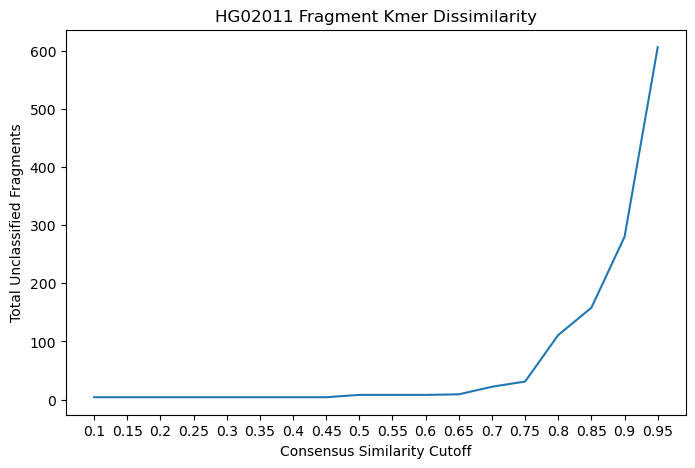

In [98]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 8,5
cutOffList = [[x,y] for x,y in CutoffDict.items()]
cutoffDF = pd.DataFrame(data=cutOffList, columns=['Similarity', 'Unknowns'])

sns.lineplot(data=cutoffDF, x='Similarity', y='Unknowns')

plt.title("HG02011 Fragment Kmer Dissimilarity")
plt.xlabel("Consensus Similarity Cutoff")
plt.ylabel("Total Unclassified Fragments")

#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG02011_kmer_Fragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [99]:
#Compare Fragments to Fragments

myCons = {'Yqhet_3k1bp':[], 'DYZ18_Yq':[], 'DYZ1_Yq':[], 'Yqhet_2k7bp':[], 'Other':[]}

for x in myDict.keys():
    
    
    currentLeader = 0.75
    currentName = 'Other'
    
    for consensus in myDict[x].keys():
    
        if float(myDict[x][consensus]) > currentLeader:
            currentLeader = float(myDict[x][consensus])
            currentName = consensus
        else:
            continue
            
    myCons[currentName].append(x)


for cons in myCons.keys():
    
    fragmentList = [x for x in myCons[cons]]

    Run = 0
    while len(fragmentList) > 0:

        currentTarget = fragmentList.pop(0)

        myDict = {}
        for x in fragmentList:
            myDict[x]= 1-float(distance.braycurtis(list(abundanceKmer.loc[x]), list(abundanceKmer.loc[currentTarget])))

        tempList = []
        tempList.append(currentTarget)

        for x,y in myDict.items():
            if y > .75:
                tempList.append(x)
                fragmentList.remove(x)
            else:
                continue

        with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG02011/myConBins/'+str(cons)+"_"+str(Run)+'.fasta', 'a+') as file:
            for row in tempList:
                if OrientationDict[row] == 'C':
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG02011.HIFIRW.ONTUL.na.chrY.fasta', "chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:"+str(row.split("HG02011:")[1])))
                else:
                    file.write(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG02011.HIFIRW.ONTUL.na.chrY.fasta', "chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:"+str(row.split("HG02011:")[1]))).split("\n")[0]+'\n')
                    string = Seq(''.join(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG02011.HIFIRW.ONTUL.na.chrY.fasta', "chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:"+str(row.split("HG02011:")[1]))).split("\n")[1:]))
                    file.write(str(string.reverse_complement())+'\n')
        file.close()

        Run+=1
    

In [100]:
rb_df['Identity'] = 'temp'
for row in rb_df.index:
    rb_df.at[row,'Identity'] = 'HG02011:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End'])
rb_df.set_index("Identity", inplace=True)
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
HG02011:16990154-17006454,0,16301,16990154,17006454,C,red
HG02011:17006455-17161397,0,154943,17006455,17161397,C,red
HG02011:17161398-17162515,0,1118,17161398,17162515,C,red
HG02011:17162516-17164106,0,1591,17162516,17164106,C,red
HG02011:17164107-17165215,0,1109,17164107,17165215,C,red
...,...,...,...,...,...,...
HG02011:40146432-40149913,27,3482,40146432,40149913,C,red
HG02011:40149914-40153412,27,3499,40149914,40153412,C,red
HG02011:40153413-40156956,27,3544,40153413,40156956,C,red


In [102]:
rb_df['Color'] = 'temp'
for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG02011/myConBins/"):
    for name in filenames:
        print(name)
        
        file1 = open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG02011/myConBins/'+name, 'r')
        Lines = file1.readlines()

        for line in tqdm(Lines): 
            if '>' in line:
                if 'Other' in name:
                    rb_df.at[str(line.split("0000585.")[1].strip()), 'Color'] = 'lime'
                elif 'DYZ1_Yq' in name:
                    rb_df.at[str(line.split("0000585.")[1].strip()), 'Color'] = 'black'
                    
                elif 'DYZ18_Yq' in name:
                    rb_df.at[str(line.split("0000585.")[1].strip()), 'Color'] = 'grey'
                    
                elif 'Yqhet_2k7bp' in name:
                    rb_df.at[str(line.split("0000585.")[1].strip()), 'Color'] = 'cyan'
                    
                elif 'Yqhet_3k1bp' in name:
                    rb_df.at[str(line.split("0000585.")[1].strip()), 'Color'] = 'red'
                    
                else:
                    print("IDK")
    
            else:
                continue

Other_4.fasta


100%|████████████████████████████████████████| 78/78 [00:00<00:00, 89533.58it/s]


Other_2.fasta


100%|█████████████████████████████████████| 252/252 [00:00<00:00, 526901.60it/s]


Other_0.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 27594.11it/s]


Yqhet_2k7bp_1.fasta


100%|███████████████████████████████████████| 47/47 [00:00<00:00, 361048.15it/s]


Other_1.fasta


100%|███████████████████████████████████████| 20/20 [00:00<00:00, 174762.67it/s]


Other_8.fasta


100%|██████████████████████████████████████████| 8/8 [00:00<00:00, 85816.96it/s]


Other_3.fasta


100%|███████████████████████████████████████| 43/43 [00:00<00:00, 313660.99it/s]


Yqhet_3k1bp_0.fasta


100%|███████████████████████████████████| 1672/1672 [00:00<00:00, 643324.13it/s]


DYZ18_Yq_0.fasta


100%|███████████████████████████████████| 2857/2857 [00:00<00:00, 725942.12it/s]


Other_6.fasta


100%|██████████████████████████████████████████| 6/6 [00:00<00:00, 67108.86it/s]


Yqhet_2k7bp_0.fasta


100%|███████████████████████████████████| 2428/2428 [00:00<00:00, 683153.56it/s]


Yqhet_3k1bp_1.fasta


100%|█████████████████████████████████████| 203/203 [00:00<00:00, 349381.91it/s]


DYZ1_Yq_0.fasta


100%|██████████████████████████████| 235986/235986 [00:00<00:00, 1124286.41it/s]


Other_7.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 17586.18it/s]


DYZ1_Yq_1.fasta


100%|███████████████████████████████████████| 55/55 [00:00<00:00, 119961.89it/s]


Other_5.fasta


100%|███████████████████████████████████████| 30/30 [00:00<00:00, 143313.35it/s]


In [103]:
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
HG02011:16990154-17006454,0,16301,16990154,17006454,C,grey
HG02011:17006455-17161397,0,154943,17006455,17161397,C,grey
HG02011:17161398-17162515,0,1118,17161398,17162515,C,red
HG02011:17162516-17164106,0,1591,17162516,17164106,C,red
HG02011:17164107-17165215,0,1109,17164107,17165215,C,red
...,...,...,...,...,...,...
HG02011:40146432-40149913,27,3482,40146432,40149913,C,black
HG02011:40149914-40153412,27,3499,40149914,40153412,C,black
HG02011:40153413-40156956,27,3544,40153413,40156956,C,black


In [104]:
for color in set(rb_df['Color']):
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/'+str(color)+".fasta", 'a+') as file:
        for row in rb_df[rb_df['Color']==color].index:
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG02011.HIFIRW.ONTUL.na.chrY.fasta', "chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585."+str(row)))
    file.close()
        

In [105]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/black.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/DYZ1.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("0000585.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|██████████████████████████████| 254954/254954 [00:00<00:00, 1070187.19it/s]


In [106]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/grey.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/DYZ18.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("0000585.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 2857/2857 [00:00<00:00, 541243.29it/s]


In [107]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/cyan.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/2kbp.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("0000585.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 2475/2475 [00:00<00:00, 510921.47it/s]


In [108]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/red.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/3kbp.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("0000585.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 1875/1875 [00:00<00:00, 528480.61it/s]


In [ ]:
####################################################################################################

In [109]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/DYZ1_dataframe.csv")

In [4]:
rb_df = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/DYZ1_dataframe.csv").set_index("Identity")
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
HG02011:16990154-17006454,0,16301,16990154,17006454,C,grey
HG02011:17006455-17161397,0,154943,17006455,17161397,C,grey
HG02011:17161398-17162515,0,1118,17161398,17162515,C,red
HG02011:17162516-17164106,0,1591,17162516,17164106,C,red
HG02011:17164107-17165215,0,1109,17164107,17165215,C,red
...,...,...,...,...,...,...
HG02011:40146432-40149913,27,3482,40146432,40149913,C,black
HG02011:40149914-40153412,27,3499,40149914,40153412,C,black
HG02011:40153413-40156956,27,3544,40153413,40156956,C,black


In [5]:
blockDefine = {x:{'Start':0, 'End':0} for x in set(rb_df['SpacerBlock'])}
for block in blockDefine.keys():
    blockDefine[block]['Start'] = int(rb_df[rb_df['SpacerBlock']==block].index[0].split("-")[0].split(":")[1])
    blockDefine[block]['End'] = int(rb_df[rb_df['SpacerBlock']==block].index[-1].split("-")[1])
blockDefine

{0: {'Start': 16990154, 'End': 18149034},
 1: {'Start': 18182761, 'End': 18900746},
 2: {'Start': 18945181, 'End': 19049376},
 3: {'Start': 19092105, 'End': 19142524},
 4: {'Start': 19153740, 'End': 20813343},
 5: {'Start': 21116214, 'End': 21811963},
 6: {'Start': 21980615, 'End': 22777166},
 7: {'Start': 23093016, 'End': 23464338},
 8: {'Start': 23672762, 'End': 24313645},
 9: {'Start': 24532953, 'End': 24955155},
 10: {'Start': 25181713, 'End': 25685889},
 11: {'Start': 25890037, 'End': 26470995},
 12: {'Start': 26679407, 'End': 27340124},
 13: {'Start': 27544922, 'End': 28027871},
 14: {'Start': 28236833, 'End': 28798811},
 15: {'Start': 29525037, 'End': 29949653},
 16: {'Start': 30056506, 'End': 30421007},
 17: {'Start': 30942438, 'End': 31235568},
 18: {'Start': 31829651, 'End': 32431078},
 19: {'Start': 32795326, 'End': 32974074},
 20: {'Start': 33283106, 'End': 33911669},
 21: {'Start': 34188799, 'End': 34954084},
 22: {'Start': 35446445, 'End': 35762145},
 23: {'Start': 369103

In [23]:
goodColors = ['cyan', 'red', 'grey']
for block in set(rb_df['SpacerBlock']):
    if str(block) == '0':
        
        for color in set(rb_df['Color']):
            if color in goodColors:
                with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/Color_Blocks/'+str(color)+"_block.fasta", 'a+') as file:
                    Start= str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[0].split("-")[0].split(":")[1])
                    if color == 'red':
                        End = str(17323219)
                    else:
                        End =str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[-1].split("-")[1])
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG02011.HIFIRW.ONTUL.na.chrY.fasta', "chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:"+Start+"-"+End))
                file.close()
                
            elif color == 'black':
                with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/Color_Blocks/black_block.fasta', 'a+') as file:
                    Start= str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[0].split("-")[0].split(":")[1])
                    End =str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[-1].split("-")[1])
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG02011.HIFIRW.ONTUL.na.chrY.fasta', "chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:"+Start+"-"+End))
                file.close()
                
            else:
                continue
    else:
        with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/Color_Blocks/black_block.fasta', 'a+') as file:
            Start= str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[0].split("-")[0].split(":")[1])
            End =str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[-1].split("-")[1])
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG02011.HIFIRW.ONTUL.na.chrY.fasta', "chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:"+Start+"-"+End))
        file.close()

In [24]:
for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/Color_Blocks/"):
    for name in filenames:
        print(name)
        
        if 'HMMER' in name or 'cleaned' in name:
            continue
        else:
        
            file1 = open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/Color_Blocks/'+name, 'r')
            Lines = file1.readlines()

            with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/Color_Blocks/'+name.split(".")[0]+'_cleaned.fasta', 'a+') as file2:
                for line in tqdm(Lines):
                    if ">" in line:
                        print(line)
                        file2.write(">"+str(line.split("0000585.")[1]))
                    else:
                        file2.write(line)
            file2.close()


            file1.close()


red_block.fasta


100%|███████████████████████████████████| 2699/2699 [00:00<00:00, 521270.27it/s]


>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:17161398-17323219

grey_block.fasta


100%|███████████████████████████████████| 2856/2856 [00:00<00:00, 515045.67it/s]


>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:16990154-17161397

black_block.fasta


 25%|███████▉                        | 61400/249133 [00:00<00:00, 613969.85it/s]

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:17417330-18149034

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:18182761-18900746

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:18945181-19049376

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:19092105-19142524

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:19153740-20813343

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:21116214-21811963

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:21980615-22777166

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:23093016-23464338

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:23672762-24313645

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:24532953-24955155

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:25181713-25685889

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:25890037-26470995

>chrY.09-24.01.HET1_centro-P

 67%|████████████████████▊          | 167355/249133 [00:00<00:00, 876046.44it/s]

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:30056506-30421007

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:30942438-31235568



100%|██████████████████████████████| 249133/249133 [00:00<00:00, 1061736.21it/s]


>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:31829651-32431078

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:32795326-32974074

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:33283106-33911669

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:34188799-34954084

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:35446445-35762145

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:36910300-37565880

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:38262712-38997705

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:39090595-39518844

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:39556274-39870612

>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:39901631-40160640

cyan_block.fasta


100%|███████████████████████████████████| 2423/2423 [00:00<00:00, 594524.31it/s]


>chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:17272023-17417329

red_block_cleaned.fasta
black_block_cleaned.fasta
runHMMER2.sh
DYZ18_hmmer.tsv


FileNotFoundError: [Errno 2] No such file or directory: '/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/Color_Blocks/DYZ18_hmmer.tsv'

In [25]:
sizeDict = {'DYZ1_Yq': 3569, 'DYZ18_Yq': 2864, 'Yqhet_3k1bp':3120, 'Yqhet_2k7bp': 2767}

In [26]:
DYZ18Dict = {x:[] for x in set(rb_df[rb_df['Color']=='grey'].index)}
DYZ1Dict = {x:[] for x in set(rb_df[rb_df['Color']=='black'].index)}
k3bpDict = {x:[] for x in set(rb_df[rb_df['Color']=='red'].index)}
k2bpDict = {x:[] for x in set(rb_df[rb_df['Color']=='cyan'].index)}

In [27]:
DYZ18_tempList = []

with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/Color_Blocks/HMMER/DYZ18_hmmer.tsv', 'r') as file:
    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                DYZ18_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                DYZ18_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

DYZ18_hmmer2 = pd.DataFrame(data=DYZ18_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
DYZ18_hmmer = DYZ18_hmmer2[DYZ18_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
DYZ18_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
28,HG02011:16990154-17161397,4,2864,2,2852,C,0.0,2465.9,2850
36,HG02011:16990154-17161397,2,2864,2854,5696,C,0.0,2447.8,2842
52,HG02011:16990154-17161397,2,2864,5698,8544,C,0.0,2405.6,2846
43,HG02011:16990154-17161397,2,2864,8546,11392,C,0.0,2438.8,2846
0,HG02011:16990154-17161397,2,2864,11394,14256,C,0.0,2513.7,2862
10,HG02011:16990154-17161397,2,2864,14258,17123,C,0.0,2477.0,2865
1,HG02011:16990154-17161397,2,2864,17125,19996,C,0.0,2506.9,2871
12,HG02011:16990154-17161397,2,2864,19998,22864,C,0.0,2471.6,2866
7,HG02011:16990154-17161397,2,2864,22866,25737,C,0.0,2488.2,2871
58,HG02011:16990154-17161397,2,2679,25739,28416,C,0.0,2258.1,2677


In [28]:
DYZ1_tempList = []

with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/Color_Blocks/HMMER/DYZ1_hmmer.tsv', 'r') as file:
    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                DYZ1_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), 'C', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                DYZ1_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), '+', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

DYZ1_hmmer2 = pd.DataFrame(data=DYZ1_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
DYZ1_hmmer = DYZ1_hmmer2[DYZ1_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
DYZ1_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
3347,HG02011:17417330-18149034,1,3569,1,3528,C,0.0,3054.4,3527
4043,HG02011:39090595-39518844,500,3569,2,3052,+,0.0,2689.5,3050
3879,HG02011:18182761-18900746,1,3567,159,3708,+,0.0,2906.4,3549
4174,HG02011:23093016-23464338,1,2229,478,2701,C,0.0,1886.7,2223
4213,HG02011:19153740-20813343,1,2114,894,2887,C,0.0,1631.3,1993
...,...,...,...,...,...,...,...,...,...
2029,HG02011:19153740-20813343,1,3569,1642338,1645886,C,0.0,3110.0,3548
1949,HG02011:19153740-20813343,1,3569,1645887,1649459,C,0.0,3111.9,3572
1985,HG02011:19153740-20813343,1,3569,1649460,1653007,C,0.0,3110.9,3547
2131,HG02011:19153740-20813343,1,3569,1653008,1656551,C,0.0,3108.1,3543


In [29]:
k3_tempList = []

with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/Color_Blocks/HMMER/Yq_3kbp_hmmer.tsv', 'r') as file:
    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                k3_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                k3_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

k3_hmmer2 = pd.DataFrame(data=k3_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
k3_hmmer = k3_hmmer2[k3_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
k3_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
44,HG02011:17161398-17323219,1229,3119,1922,3796,C,0.0,1674.6,1874
1,HG02011:17161398-17323219,2,3119,3796,6932,C,0.0,2774.7,3136
43,HG02011:17161398-17323219,1230,3119,7743,9631,C,0.0,1689.0,1888
41,HG02011:17161398-17323219,1229,3119,10441,12330,C,0.0,1692.0,1889
9,HG02011:17161398-17323219,2,3119,12330,15451,C,0.0,2741.7,3121
2,HG02011:17161398-17323219,2,3119,15451,18582,C,0.0,2769.9,3131
0,HG02011:17161398-17323219,2,3119,18582,21713,C,0.0,2777.1,3131
33,HG02011:17161398-17323219,609,3119,22355,24864,C,0.0,2247.2,2509
42,HG02011:17161398-17323219,1229,3119,25674,27563,C,0.0,1691.2,1889
5,HG02011:17161398-17323219,2,3119,27563,30689,C,0.0,2751.3,3126


In [30]:
k2_tempList = []

with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Con_Seqs/Color_Blocks/HMMER/Yq_2k7bp_hmmer.tsv', 'r') as file:
    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            #Normally antisense
            if info[8] == '-':
                k2_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                k2_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

k2_hmmer2 = pd.DataFrame(data=k2_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
k2_hmmer = k2_hmmer2[k2_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
k2_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
34,HG02011:17272023-17417329,2,1312,51196,52496,C,0.0,1035.7,1300
33,HG02011:17272023-17417329,1271,2766,52485,53985,C,0.0,1317.1,1500
13,HG02011:17272023-17417329,2,2766,53985,56744,C,0.0,2484.1,2759
15,HG02011:17272023-17417329,2,2766,56744,59498,C,0.0,2479.5,2754
12,HG02011:17272023-17417329,2,2766,59498,62252,C,0.0,2484.8,2754
11,HG02011:17272023-17417329,2,2766,62252,65006,C,0.0,2487.1,2754
16,HG02011:17272023-17417329,2,2766,65006,67775,C,0.0,2478.0,2769
0,HG02011:17272023-17417329,2,2766,67775,70539,C,0.0,2519.6,2764
24,HG02011:17272023-17417329,2,2766,70539,73290,C,0.0,2449.1,2751
4,HG02011:17272023-17417329,2,2766,73290,76059,C,0.0,2500.3,2769


In [31]:
DYZ18_hmmer['Start']=0
DYZ1_hmmer['Start']=0
k3_hmmer['Start']=0
k2_hmmer['Start']=0

DYZ18_hmmer['End']=0
DYZ1_hmmer['End']=0
k3_hmmer['End']=0
k2_hmmer['End']=0

DYZ18_hmmer['Color']='grey'
DYZ1_hmmer['Color']='black'
k3_hmmer['Color']='red'
k2_hmmer['Color']='cyan'

DYZ18_hmmer['SpacerBlock']=0
DYZ1_hmmer['SpacerBlock']=0
k3_hmmer['SpacerBlock']=0
k2_hmmer['SpacerBlock']=0

In [32]:
for row in DYZ18_hmmer.index:
    DYZ18_hmmer.at[row,'Start'] = int(DYZ18_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ18_hmmer.at[row,'fstart'])
    DYZ18_hmmer.at[row,'End'] = int(DYZ18_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ18_hmmer.at[row,'fend'])
for row in DYZ1_hmmer.index:
    DYZ1_hmmer.at[row,'Start'] = int(DYZ1_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ1_hmmer.at[row,'fstart'])
    DYZ1_hmmer.at[row,'End'] = int(DYZ1_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ1_hmmer.at[row,'fend'])
for row in k3_hmmer.index:
    k3_hmmer.at[row,'Start'] = int(k3_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k3_hmmer.at[row,'fstart'])
    k3_hmmer.at[row,'End'] = int(k3_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k3_hmmer.at[row,'fend'])
for row in k2_hmmer.index:
    k2_hmmer.at[row,'Start'] = int(k2_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k2_hmmer.at[row,'fstart'])
    k2_hmmer.at[row,'End'] = int(k2_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k2_hmmer.at[row,'fend'])

In [33]:
LimeDF = rb_df[rb_df['Color']=="lime"].reset_index().rename(columns={'Identity':'Fragment'}).copy()

In [34]:
concattd = [DYZ18_hmmer, k3_hmmer,k2_hmmer,DYZ1_hmmer ]
newDF = pd.concat(concattd).drop(columns=['qstart', 'qend','fstart','fend','evalue','score'])
newDF.rename(columns={'orientation':"Orientation"}, inplace=True)
finalList = [newDF, LimeDF]
finalDF2 = pd.concat(finalList)
finalDF = finalDF2[finalDF2['Color']!='lime'].copy()
finalDF.sort_values(by='Start', ascending=True, inplace=True)

In [35]:
finalDF.reset_index(inplace=True)

In [36]:
for row in finalDF.index:
    for block in blockDefine.keys():
        if int(finalDF.at[row,'Start']) >= int(blockDefine[block]['Start']) and int(finalDF.at[row,'End']) <= int(blockDefine[block]['End']):
            finalDF.at[row,'SpacerBlock']= block
        else:
            continue

In [3]:
#for row in finalDF.index:
#    if str(finalDF.at[row,'Fragment']).strip() in list(rb_df.index):
#        finalDF.at[row,'SpacerBlock'] = rb_df.at[str(finalDF.at[row,'Fragment']),'SpacerBlock']
#    else:
#        continue
#finalDF

In [20]:
finalDF[finalDF['SpacerBlock']==0].iloc[[95]]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
95,31,HG02011:17161398-17272022,C,2025,17269998,17272023,red,0


In [21]:
finalDF[finalDF['SpacerBlock']==0].iloc[[96]]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
96,34,HG02011:17272023-17417329,C,1300,17323219,17324519,cyan,0


In [22]:
17323219-17272023

51196

In [37]:
lapList = []
overlaps = []
for spacerblock in set(finalDF['SpacerBlock']):
    tempDF = finalDF[finalDF['SpacerBlock']==spacerblock].copy()
    i=0
    while i < len(tempDF.index):
        try:
            lapList.append(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
            
            if int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']) > 40000:
                print(spacerblock)
                print(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
                print(i)
                overlaps.append(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
                print('\n')
                
            if int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']) < 0:
                print(spacerblock)
                print(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
                print(i)
                overlaps.append(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
                print('\n')
            i+=1
        except:
            i+=1
            continue
#lapList

0
-11
111


0
-14
178


0
-9
179


0
-12
181


0
-14
182


0
-25
286


0
-25
353


1
-14
35


1
-21
36


1
-13
37


1
-20
38


1
-21
39


1
-20
40


1
-12
90


1
-14
102


1
-13
103


1
-13
104


1
-27
105


1
-13
106


1
-14
107


1
-14
108


1
-15
109


1
-12
110


1
-13
111


1
-13
112


1
-13
113


1
-22
114


1
-13
115


1
-12
178


4
-30
6


4
-30
9


4
-12
102


4
-12
105


4
-15
111


4
-10
124


4
-19
164


4
-9
252


4
-9
266


4
-8
283


4
-25
308


5
-23
0


5
-15
26


5
-25
103


5
-25
105


5
-25
120


5
-25
148


5
-25
150


5
-25
155


5
-25
162


5
-25
169


5
-25
176


6
-21
0


7
-31
29


8
-18
0


8
-12
27


8
-25
103


8
-25
105


8
-25
134


8
-25
136


9
-27
0


9
-25
48


9
-25
50


10
-27
0


10
-17
60


10
-13
69


10
-25
96


10
-25
100


11
-26
0


12
-18
0


12
-12
27


12
-25
99


12
-25
101


12
-25
134


12
-25
136


12
-25
155


13
-27
0


13
-22
54


13
-17
62


13
-25
89


13
-25
93


14
-26
0


15
-32
0


16
-18
0


16
-9
61


16
-16
79


16
-16
82



In [38]:
print(len(overlaps))

107


(array([ 3.,  3.,  2.,  7., 32.,  1.,  3.,  6.,  1.,  7.,  5.,  6., 18.,
         2.,  6.,  3.,  1.,  0.,  0.,  1.]),
 array([-32.  , -30.45, -28.9 , -27.35, -25.8 , -24.25, -22.7 , -21.15,
        -19.6 , -18.05, -16.5 , -14.95, -13.4 , -11.85, -10.3 ,  -8.75,
         -7.2 ,  -5.65,  -4.1 ,  -2.55,  -1.  ]),
 <BarContainer object of 20 artists>)

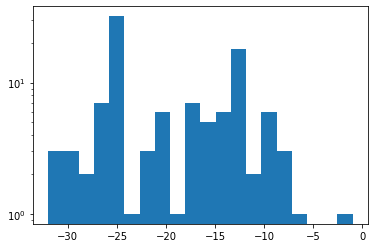

In [39]:
plt.hist(overlaps, log=True, bins=20)

3899
-32


(array([4.299e+03, 3.300e+01, 1.900e+01, 1.900e+01, 1.400e+01, 1.400e+01,
        2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ -32.  ,  164.55,  361.1 ,  557.65,  754.2 ,  950.75, 1147.3 ,
        1343.85, 1540.4 , 1736.95, 1933.5 , 2130.05, 2326.6 , 2523.15,
        2719.7 , 2916.25, 3112.8 , 3309.35, 3505.9 , 3702.45, 3899.  ]),
 <BarContainer object of 20 artists>)

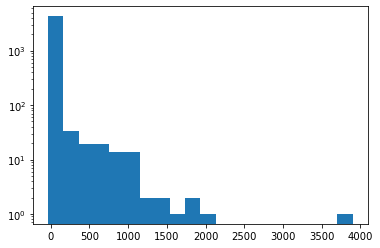

In [40]:
print(max(lapList))
print(min(lapList))

plt.hist(lapList, log=True, bins=20)

In [41]:
#rb_dfold = rb_df.copy()
rb_df = finalDF.copy()

In [174]:
rb_df[rb_df['Color']=='lime']

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
365,0,HG02011:18182761-18182920,+,160,18182761,18182920,lime,1
396,1,HG02011:18287531-18287925,+,395,18287531,18287925,lime,1
579,2,HG02011:18897863-18900746,+,2884,18897863,18900746,lime,1
580,3,HG02011:18945181-18947699,C,2519,18945181,18947699,lime,2
610,4,HG02011:19092105-19094991,C,2887,19092105,19094991,lime,3
626,5,HG02011:19153740-19156626,C,2887,19153740,19156626,lime,4
712,6,HG02011:19433707-19433995,C,289,19433707,19433995,lime,4
1474,7,HG02011:22531364-22533062,C,1699,22531364,22533062,lime,6
1524,8,HG02011:22703023-22703047,+,25,22703023,22703047,lime,6
2105,9,HG02011:25679008-25679312,C,305,25679008,25679312,lime,10


# Export and update

In [175]:
rb_df[(rb_df['SpacerBlock']==0) & (rb_df['Color']=='black')]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
143,3255,HG02011:17417330-17420857,C,3527,17417331,17420858,black,0
144,3326,HG02011:17420858-17424401,C,3543,17420859,17424402,black,0
145,2628,HG02011:17424402-17427975,C,3573,17424403,17427976,black,0
146,3026,HG02011:17427976-17431504,C,3528,17427977,17431505,black,0
147,2598,HG02011:17431505-17435078,C,3573,17431506,17435079,black,0
...,...,...,...,...,...,...,...,...
360,4238,HG02011:18132931-18134568,C,1637,18132932,18134569,black,0
361,3130,HG02011:18134569-18138102,C,3533,18134570,18138103,black,0
362,3250,HG02011:18138103-18141661,C,3558,18138104,18141662,black,0
363,3830,HG02011:18142607-18146740,C,3240,18143501,18146741,black,0


In [188]:
tempDF.at[0,'Start']=17417331
tempDF.at[0,'Length']= (18149033-17417331)
tempDF

,Block_Number,Block_Type,Length,Start,End,SampleName
0,0,Spacer Block,731702,17417331,18149033,HG02011
1,0,Repeat Block,33726,18149034,18182759,HG02011
2,1,Spacer Block,717986,18182760,18900745,HG02011
3,1,Repeat Block,44434,18900746,18945179,HG02011
4,2,Spacer Block,104196,18945180,19049375,HG02011
5,2,Repeat Block,42728,19049376,19092103,HG02011
6,3,Spacer Block,50420,19092104,19142523,HG02011
7,3,Repeat Block,11215,19142524,19153738,HG02011
8,4,Spacer Block,1659604,19153739,20813342,HG02011
9,4,Repeat Block,302870,20813343,21116212,HG02011


In [43]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Finalized_Fragmentdf.csv")

In [189]:
#tempDF.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG02011/BlockSize_dataframe.csv")

## Visualize

In [44]:
import turtle

In [45]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
#groupNames = list(goodAluGroupDict.keys())
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HG02011 Yq Heterochromatin Spacer Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(list(set(rb_df['SpacerBlock']))):
    
    totalAlus = len(rb_df[rb_df['SpacerBlock']==key])
        
    turtle.color("black")
    turtle.forward(75)
    currentPosition = turtle.position()
    

    if lengthFlag == 0:
        turtle.setposition(currentPosition)
    else:
        #turtle.setposition(turtle.pos()[0]-10, turtle.pos()[1]+20)
        #turtle.write(str(BlockListDistance[key]), align="right")
        turtle.setposition(currentPosition)

    currentPosition = turtle.position()
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Spacer Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    tempDF = rb_df[rb_df['SpacerBlock']==key].copy() 
    for item in tempDF.index:
        
        if tempDF.at[item,'Orientation'] == 'C':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(.5)
        
        elif tempDF.at[item,'Orientation'] == '+':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(.5)

        elif tempDF.at[item,'Orientation'] == 'temp':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(.5)
        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|███████████████████████████████████████████| 28/28 [08:32<00:00, 18.31s/it]


In [46]:
from PIL import Image

In [47]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [48]:
ts = turtle.getscreen()
#save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/HG02011/HG02011_YqHeterochromatin_DYZ1_HMMER_Fiinalized")

In [49]:
turtle.bye()